<h1 style="color: #9B243A;">Portfolio Analysis</h1>

<h3 style="color: #b35a;">-- Importing important libraries --</h3>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h1 style="color: #e8891d;">Data Loading and Price Charting</h1>

In [7]:
asset_price = pd.read_csv("asset_price_data.csv")

In [8]:
asset_price.shape

(783, 6)

In [9]:
asset_price.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


<h3 style="color: #b35a;">-- Copy as best practice --</h3>

In [11]:
df = asset_price.copy()

<h3 style="color: #b35a;">-- Column Standardization and Data Cleaning --</h3>

In [13]:
def standardize_and_clean(df):
    """
    A function that standardizes column names, sets "date" series as index and cleans a dataframe by handling null values using forward fill and removing duplicated rows.

    Parameters:
        df (pd.DataFrame): The input dataframe to clean.

    Returns:
        pd.DataFrame: A standardized and clean dataframe.
    """

    # Step 1: Standardizing column names:
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

    # Step 2: Converting 'date' to datetime and seting it as index:
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)

    # Step 3: Checking for and replacing empty spaces with NaNs:
    df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

    # Step 4: Checking for null values:
    print("Null values in each column before handling:")
    print(df.isnull().sum())

    # Step 5: Handling missing values (Forward Fill):
    df.fillna(method='ffill', inplace=True)

    #Step 6: Checking for duplicates:
    num_duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Step 7: Handling duplicate rows:
    if num_duplicates > 0:
        user_input = input("Do you want to remove duplicate rows? (yes/no): ").strip().lower()
        if user_input in ['yes', 'y']:
            df = df[~df.duplicated(keep='first')]
            print("Duplicate rows have been removed.")
        else:
            print("Duplicate rows have been retained.")

    return df

In [18]:
df = standardize_and_clean(df)

Null values in each column before handling:
asset1    13
asset2    13
asset3    13
asset4    49
asset5    20
dtype: int64
Number of duplicate rows: 13


Do you want to remove duplicate rows? (yes/no):  yes


Duplicate rows have been removed.


In [35]:
df.shape

(770, 5)

<h3 style="color: #b35a;">-- Visualizing Asset trends over time --</h3>

In [38]:
# ensuring all asset price series begin at a uniform value (100):
normalized_df = df / df.iloc[0] * 100

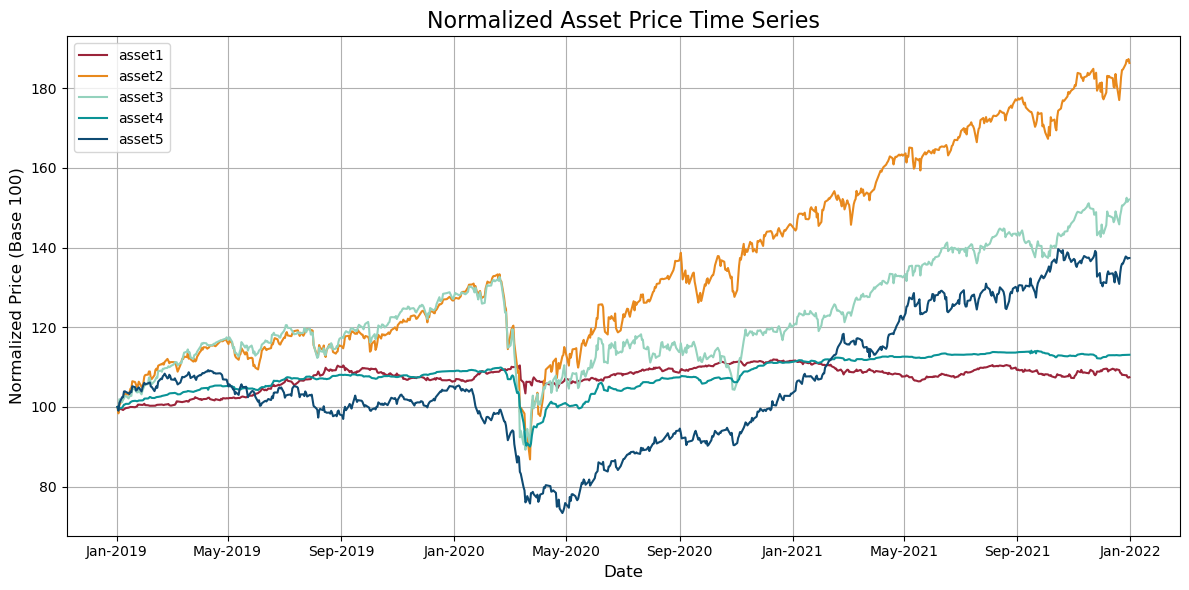

In [40]:
import matplotlib.dates as mdates

colors = ['#9B243A', '#e8891d', '#94D2BD', '#0A9396', '#0F4B73']

plt.figure(figsize=(12, 6))
for color, column in zip(colors, normalized_df.columns):
    plt.plot(normalized_df.index, normalized_df[column], label=column, color=color)

plt.title("Normalized Asset Price Time Series", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Price (Base 100)", fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="upper left")
plt.grid(visible=True)
plt.tight_layout()
plt.show()

<h3 style="color: #b35a;">-- Insights --</h3>

From this plot, we can draw the following conclusions:

- Asset1 and Asset4 show the least amount of growth over time, maintaining relatively stable (flat) price levels compared to the other assets. This indicates that these assets might be less volatile or influenced by external factors compared to others in the dataset.
- Early 2020 (between February and March) rendered a general decrease in price accross all Assets (except for Asset1) - possibly linked to the COVID-19 pandemic.
- From May 2020 onward, Asset2 has consistently outperformed the other assets.

<h1 style="color: #e8891d;">Daily Percentage Returns</h1>

In [45]:
# Calculating the daily percentage returns for each financial asset:
'''
I'll use the pct_change() pandas function to get the percentage change between the current and prior element in the dataframe.
This function is commonly used to calculate daily percentage returns,
allowing us to measure how much an asset's price has changed relative to the previous period (day).
'''

returns = df.pct_change()

In [47]:
print(f"The average daily returns for each Asset are: \n{returns.mean().sort_values(ascending=False)*100}")

The average daily returns for each Asset are: 
asset2    0.088310
asset3    0.061523
asset5    0.045845
asset4    0.016565
asset1    0.009800
dtype: float64


<h3 style="color: #b35a;">-- Insights --</h3>

Based on their daily performance, all assets exhibit positive average daily returns, indicating overall growth.
- Asset2 has the highest average daily return, suggesting it experienced the strongest growth on a daily basis.
- Asset1 has the lowest average daily return, reflecting relatively weaker daily growth compared to the other assets.

In [51]:
# Calculating the correlation matrix for the daily returns of the five assets:
correlation_matrix = returns.corr()

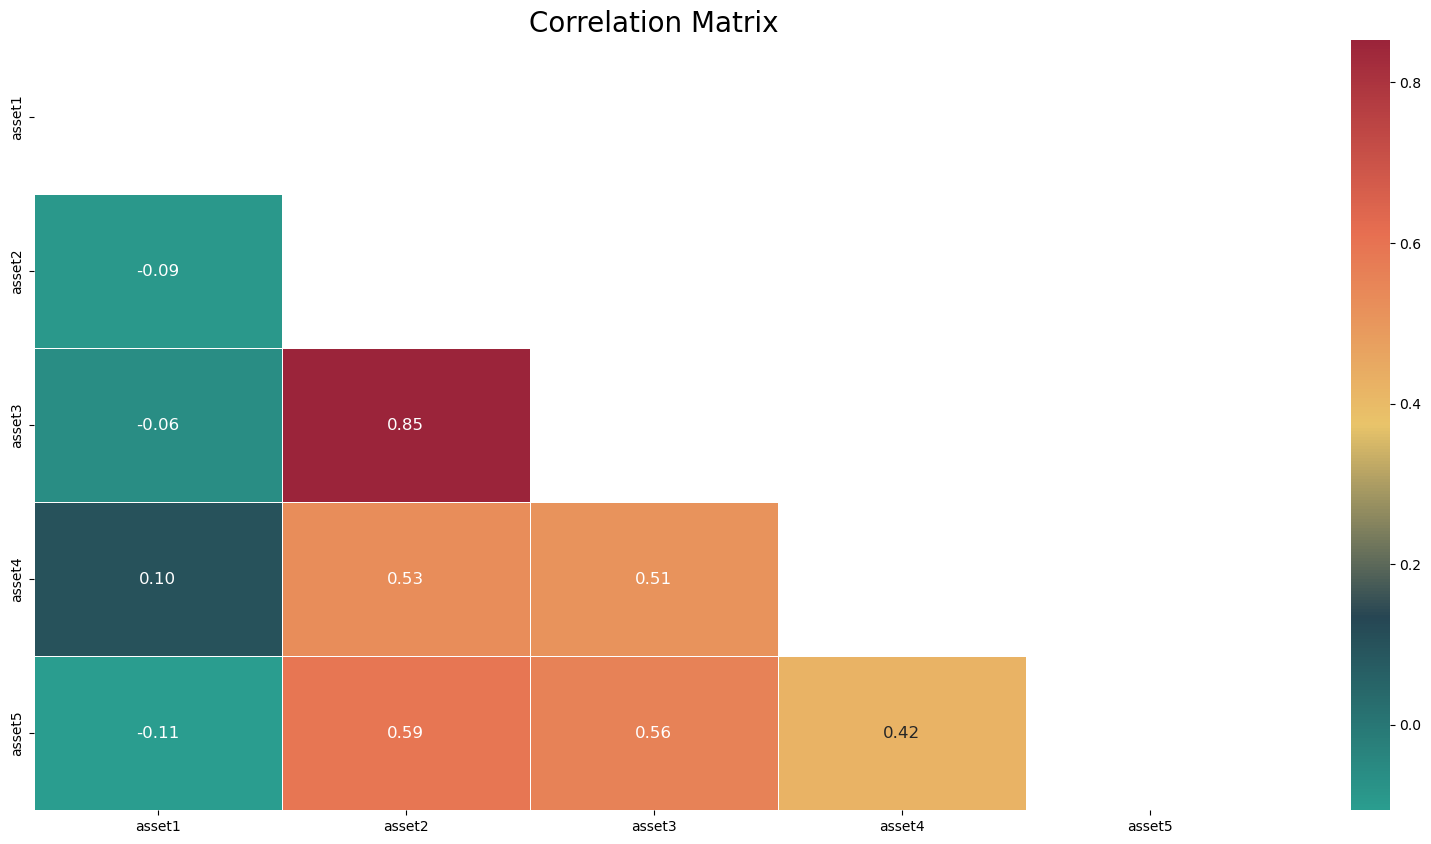

In [53]:
from matplotlib.colors import LinearSegmentedColormap

custom_colors = ['#2A9D8F', '#264653', '#E9C46A', '#E76F51', '#9B243A']
custom_cmap = LinearSegmentedColormap.from_list("DesertGradient", custom_colors)

mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True # to hide repeated half of the matrix

f, ax = plt.subplots(figsize=(20, 10))

ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap=custom_cmap, fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Matrix", fontsize=20) 
plt.show()

<h3 style="color: #b35a;">-- Insights --</h3>

- The strongest correlation can be observed between Asset2 and Asset3, suggesting that these two assets exhibit similar daily growth trends, possibly influended by common factors.
- Asset1 has weak correlations (close to zero) with all other Assets. This indicates that Asset1's daily growth is largely independent, making it an excellent candidate for diversification. Including Asset1 in a portfolio can help reduce overall risk by offsetting the movements of more correlated assets.

In [57]:
columns = returns.columns.tolist()
asset_pairs = [(columns[i], columns[j]) for i in range(len(columns)) for j in range(i + 1, len(columns))]

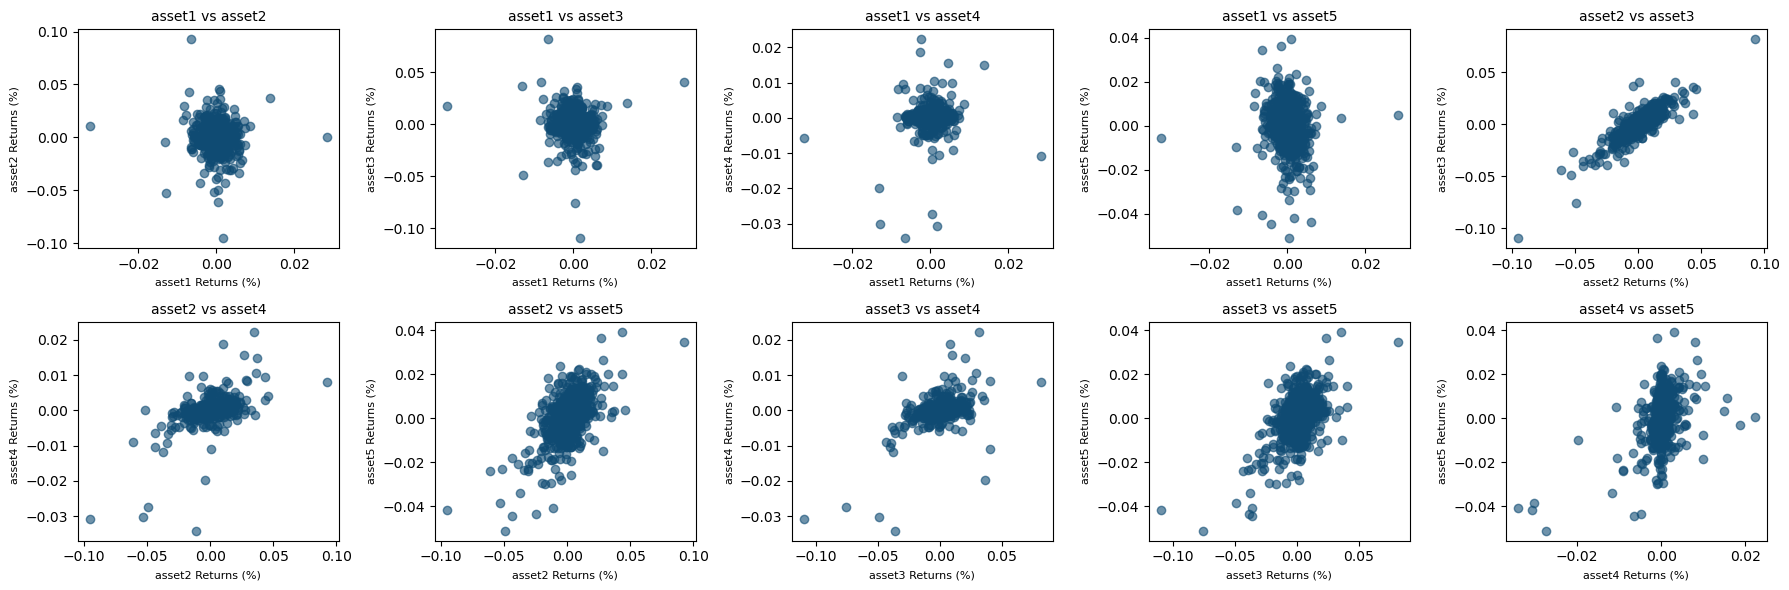

In [59]:
# Scatter plots comparing the daily returns of pairs of assets:

ncols = 5
nrows = math.ceil(len(asset_pairs) / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 3))
axes = axes.flatten()

for ax, (asset_x, asset_y) in zip(axes, asset_pairs):
    ax.scatter(returns[asset_x], returns[asset_y], alpha=0.6, color="#0F4B73")
    ax.set_title(f"{asset_x} vs {asset_y}", fontsize=10)
    ax.set_xlabel(f"{asset_x} Returns (%)", fontsize=8)
    ax.set_ylabel(f"{asset_y} Returns (%)", fontsize=8)
    ax.grid(visible=False)
    ax.set_facecolor('none')

# Hiding any unused axes:
for ax in axes[len(asset_pairs):]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.show()

<h3 style="color: #b35a;">-- Insights --</h3>

- The scatter plots confirm a strong positive linear correlation between Asset2 and Asset3, as indicated by the upward-trending clusters of points.
- The scatter plots highlight the weak correlations between Asset1 and the other assets, evident from the random, zero-centered cloud of points.
- Scatter plots involving Asset4 reveal the highest frequency of outliers compared to other pairings. These anomalies may indicate systemic risks or unique volatility associated with Asset4.

<h1 style="color: #e8891d;">Portfolio Performance Analysis</h1>

In [64]:
portfolio_weights = pd.read_csv("portfolio_weights.csv")

In [66]:
portfolio_weights.shape

(783, 6)

In [68]:
portfolio_weights.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [70]:
df2 = portfolio_weights.copy()

In [72]:
df2 = standardize_and_clean(df2)

Null values in each column before handling:
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64
Number of duplicate rows: 780


Do you want to remove duplicate rows? (yes/no):  no


Duplicate rows have been retained.


In [74]:
df2.shape

(783, 5)

<h3 style="color: #b35a;">-- Visualizing Asset weights --</h3>

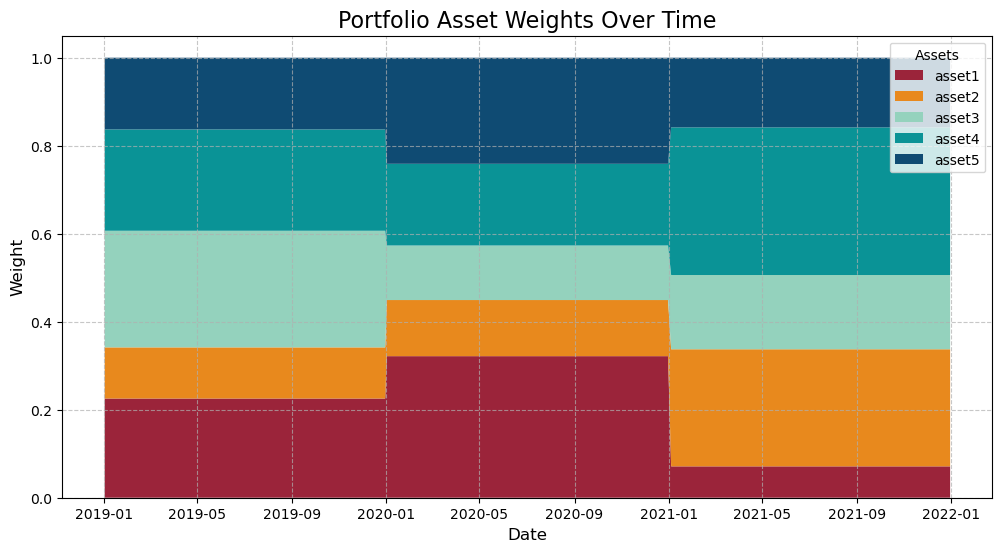

In [158]:
colors = ['#9B243A', '#e8891d', '#94D2BD', '#0A9396', '#0F4B73']

plt.figure(figsize=(12, 6))
plt.stackplot(df2.index, 
              df2.T,
              labels=df2.columns,
              colors=colors)

# Add legend, title, and labels
plt.legend(loc='upper right', title="Assets")
plt.title("Portfolio Asset Weights Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the chart
plt.show()

<h3 style="color: #b35a;">-- Insights --</h3>

- This plot highlights clear changes in asset weights between January 2020 and January 2021, reflecting shifts across all assets.
- Asset 5, and particularly Asset 1, experienced significant weight increases during this period, contributing to portfolio balance as the weights of other assets decreased.
- After January 2021, Asset 2 and Asset4 recovered strongly, as can is evident in the expansion of their respective bands..

In [76]:
df2 = df2.loc[returns.index]

In [78]:
df2.shape

(770, 5)

In [80]:
returns.shape

(770, 5)

<h3 style="color: #b35a;">-- Analysing Portfolio metrics --</h3>

In [87]:
def calculate_portfolio_metrics(df, returns):
    """
    This function will take two dataframes (one with portfolio weights and another with daily asset returns), to estimate the following metrics:
        - Portfolio cumulative returns,
        - Portfolio annualized return
        - Portfolio annualized volatility (using an annualization factor of 261 days).
        - Plot the historical cumulative returns of the portfolio.

    Parameters:
        df (pd.DataFrame): Portfolio weights dataframe (cleaned and standardized).
        returns (pd.DataFrame): Daily returns for individual assets (cleaned and standardized).

    Returns:
        None
    """
    # Portfolio daily returns:
    portfolio_daily_returns = (df * returns).sum(axis=1)

    # Cumulative returns:
    portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod() - 1

    # Annualized return:
    cumulative_return_end = portfolio_cumulative_returns.iloc[-1]
    total_days = len(portfolio_daily_returns)
    annualized_return = ((1 + cumulative_return_end) ** (261 / total_days)) - 1

    # Annualized volatility
    daily_volatility = portfolio_daily_returns.std()
    annualized_volatility = daily_volatility * np.sqrt(261)

    # Displaying results:
    print(f"Cumulative Return: {cumulative_return_end:.4%}")
    print(f"Annualized Return: {annualized_return:.4%}")
    print(f"Annualized Volatility: {annualized_volatility:.4%}")

    # Plotting portfolio cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, color='#9B243A', label="Portfolio Cumulative Returns")
    plt.title("Portfolio Historical Cumulative Returns", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Cumulative Return", fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.legend(loc="upper left")
    plt.show()

Cumulative Return: 38.5714%
Annualized Return: 11.6920%
Annualized Volatility: 8.5784%


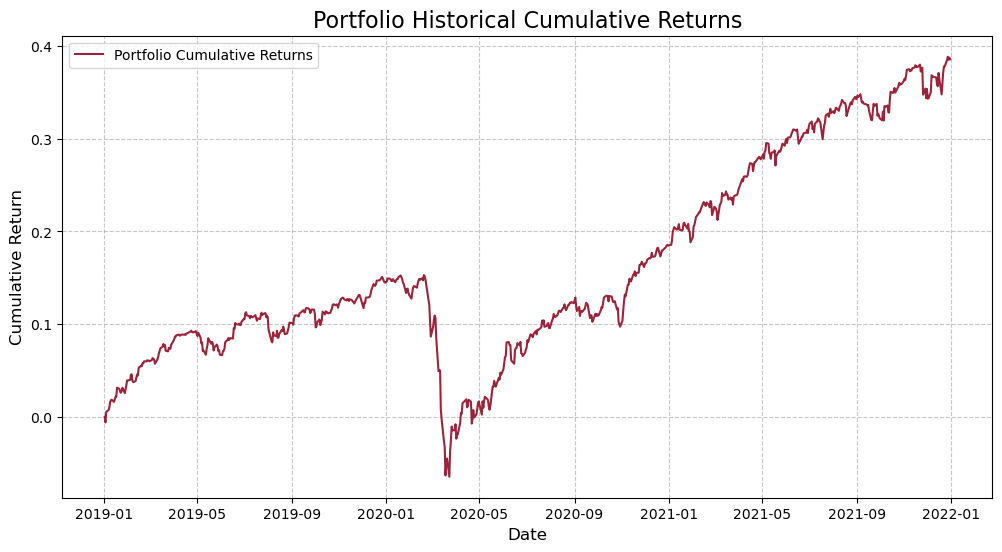

In [91]:
calculate_portfolio_metrics(df2, returns)

<h3 style="color: #b35a;">-- Insights --</h3>

- Despite the sharp decline in cumulative returns during early 2020, coinciding with the onset of the COVID-19 pandemic, the portfolio demonstrates a steady upward trajectory before and thereafter, reflecting consistent growth over time.
- The positive cumulative return of 38.57% highlights the portfolio's ability to achieve growth, even while accounting for the challenges posed by the pandemic.
- An annualized return of 11.6920% underscores effective investment strategies and robust portfolio performance.
- The annualized volatility of 8.58% is moderate, signaling relatively controlled risk and a well-managed balance between risk and return.
- Overall, the portfolio has delivered strong cumulative and annualized returns, reflecting effective management and favorable market conditions, making it appealing to investors seeking a blend of growth and moderate risk exposure.

<h3 style="color: #b35a;">-- Asset weights by category --</h3>

In [97]:
asset_info = pd.read_csv('asset_information_data.csv')

In [99]:
standardize_and_clean(asset_info)

Null values in each column before handling:
name      0
family    0
dtype: int64
Number of duplicate rows: 0


,name,family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [101]:
asset_info[["name", "family"]] = asset_info[["name", "family"]].apply(lambda x: x.str.lower())

In [103]:
returns.head()

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192


In [105]:
df2.head()

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [107]:
portfolio_with_categories = df2.T

In [109]:
portfolio_with_categories = portfolio_with_categories.reset_index()

In [111]:
portfolio_with_categories.rename(columns={"index": "name"}, inplace=True)

In [113]:
portfolio_with_categories.columns.name = None

In [115]:
portfolio_with_categories.set_index('name', inplace=True)

In [117]:
portfolio_with_categories

,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
name,,,,,,,,,,,,,,,,,,,,,
asset1,0.225458,0.225458,0.225458,0.225458,0.225458,0.225458,0.225458,0.225458,0.225458,0.225458,...,0.071307,0.071307,0.071307,0.071307,0.071307,0.071307,0.071307,0.071307,0.071307,0.071307
asset2,0.116255,0.116255,0.116255,0.116255,0.116255,0.116255,0.116255,0.116255,0.116255,0.116255,...,0.266093,0.266093,0.266093,0.266093,0.266093,0.266093,0.266093,0.266093,0.266093,0.266093
asset3,0.265003,0.265003,0.265003,0.265003,0.265003,0.265003,0.265003,0.265003,0.265003,0.265003,...,0.168775,0.168775,0.168775,0.168775,0.168775,0.168775,0.168775,0.168775,0.168775,0.168775
asset4,0.230310,0.230310,0.230310,0.230310,0.230310,0.230310,0.230310,0.230310,0.230310,0.230310,...,0.335470,0.335470,0.335470,0.335470,0.335470,0.335470,0.335470,0.335470,0.335470,0.335470
asset5,0.162974,0.162974,0.162974,0.162974,0.162974,0.162974,0.162974,0.162974,0.162974,0.162974,...,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356,0.158356


In [119]:
portfolio_with_categories = portfolio_with_categories.merge(asset_info, left_index=True, right_on='name', how='left')

In [122]:
# Grouping asset weights by their categories:
portfolio_with_categories = portfolio_with_categories.drop(columns=['name'])
portfolio_with_categories = portfolio_with_categories.groupby('family').sum()

In [126]:
portfolio_with_categories.reset_index(inplace=True)

In [128]:
portfolio_with_categories = portfolio_with_categories.T

In [130]:
portfolio_with_categories.columns = portfolio_with_categories.iloc[0]

In [132]:
portfolio_with_categories = portfolio_with_categories[1:]

In [134]:
portfolio_with_categories.index = pd.to_datetime(portfolio_with_categories.index)

In [136]:
portfolio_with_categories.columns.name = None

In [138]:
portfolio_with_categories = portfolio_with_categories.apply(pd.to_numeric, errors='coerce')

In [140]:
portfolio_with_categories

,alternative,equity,fixed income
2019-01-02,0.162974,0.495313,0.341713
2019-01-03,0.162974,0.495313,0.341713
2019-01-04,0.162974,0.495313,0.341713
2019-01-07,0.162974,0.495313,0.341713
2019-01-08,0.162974,0.495313,0.341713
...,...,...,...
2021-12-27,0.158356,0.504245,0.337400
2021-12-28,0.158356,0.504245,0.337400
2021-12-29,0.158356,0.504245,0.337400
2021-12-30,0.158356,0.504245,0.337400


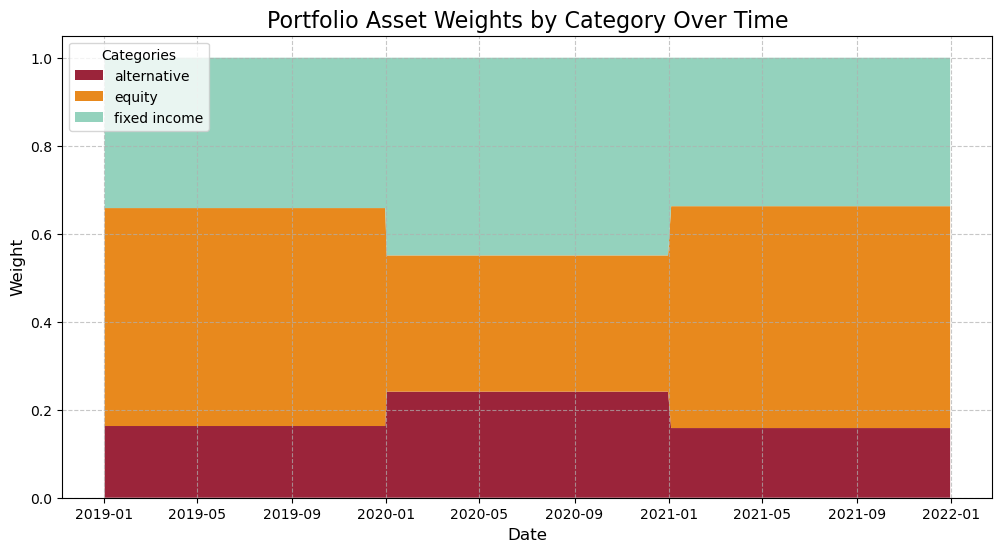

In [160]:
category_colors = ['#9B243A', '#e8891d', '#94D2BD']

plt.figure(figsize=(12, 6))
plt.stackplot(portfolio_with_categories.index,
              portfolio_with_categories.T,
              labels=portfolio_with_categories.columns,
              colors=category_colors)

# Add title, labels, and legend
plt.title("Portfolio Asset Weights by Category Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.legend(loc='upper left', title="Categories")
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the chart
plt.show()

<h3 style="color: #b35a;">-- Insights --</h3>

This plot highlights the portfolio's strategic adjustments during the pandemic:

- An increased dominance of fixed income reflects a shift toward a more conservative approach.
- A reduction in equity weights indicates a move away from higher-risk assets.
- A simultaneous rise in alternative asset weights suggests diversification efforts to mitigate risk and stabilize returns.